Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [2]:
parent_dir = '../../data/ping_pong/'

NMSG = 1_000_000_000
ITERATIONS = 15
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}9/ping_pong_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}9/ping_pong_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}9/ping_pong_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}9/ping_pong_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [3]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Mar 15 03:44:24 2025 +0100) (512.11ms ela...,7.590,0.0802,0.917,8.40,0.98,49.16,59.02 C,Nominal
1,(Sat Mar 15 03:44:25 2025 +0100) (506.78ms ela...,12.500,0.0396,0.815,13.38,1.68,98.12,58.92 C,Nominal
2,(Sat Mar 15 03:44:25 2025 +0100) (505.31ms ela...,4.340,0.0881,1.070,5.35,0.96,54.93,58.92 C,Nominal
3,(Sat Mar 15 03:44:26 2025 +0100) (509.33ms ela...,1.160,0.0477,0.614,1.86,0.62,34.48,58.78 C,Nominal
4,(Sat Mar 15 03:44:26 2025 +0100) (508.10ms ela...,0.426,0.0000,0.359,0.75,0.33,22.06,58.78 C,Nominal


In [4]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(14777, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Mar 15 03:44:36 2025 +0100) (1008.60ms el...,37.4,0.0689,1.160,39.67,3.90,99.28,62.58 C,Nominal
1,(Sat Mar 15 03:44:37 2025 +0100) (1005.37ms el...,36.1,0.0190,0.621,38.52,3.89,98.01,66.41 C,Nominal
2,(Sat Mar 15 03:44:38 2025 +0100) (1004.96ms el...,36.1,0.0234,0.569,38.43,3.87,97.81,69.41 C,Nominal
3,(Sat Mar 15 03:44:39 2025 +0100) (1006.02ms el...,35.6,0.0000,0.516,37.77,3.84,97.17,71.78 C,Nominal
4,(Sat Mar 15 03:44:40 2025 +0100) (1006.00ms el...,36.4,0.0000,0.541,38.73,3.89,98.11,73.84 C,Nominal


In [5]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Mar 15 19:32:05 2025 +0100) (510.81ms ela...,5.890,0.0638,0.724,6.59,0.81,46.84,53.38 C,Nominal
1,(Sat Mar 15 19:32:05 2025 +0100) (506.33ms ela...,6.130,0.0570,0.741,6.83,0.86,47.83,53.59 C,Nominal
2,(Sat Mar 15 19:32:06 2025 +0100) (505.14ms ela...,2.830,0.0791,0.745,3.69,0.84,46.82,53.59 C,Nominal
3,(Sat Mar 15 19:32:06 2025 +0100) (509.08ms ela...,0.927,0.0364,0.511,1.53,0.63,38.64,53.50 C,Nominal
4,(Sat Mar 15 19:32:07 2025 +0100) (509.70ms ela...,0.460,0.0000,0.310,0.66,0.25,13.56,53.50 C,Nominal


In [6]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(11784, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Mar 15 19:32:16 2025 +0100) (1011.55ms el...,18.3,0.0635,0.804,19.24,1.78,96.75,57.65 C,Nominal
1,(Sat Mar 15 19:32:17 2025 +0100) (1004.41ms el...,21.1,0.0263,0.644,22.30,2.08,97.11,60.09 C,Nominal
2,(Sat Mar 15 19:32:18 2025 +0100) (1005.99ms el...,13.1,0.0281,0.376,13.89,1.08,98.45,62.31 C,Nominal
3,(Sat Mar 15 19:32:19 2025 +0100) (1006.68ms el...,18.9,0.0000,0.572,19.56,1.82,97.59,64.41 C,Nominal
4,(Sat Mar 15 19:32:20 2025 +0100) (1005.69ms el...,13.9,0.0000,0.412,14.74,1.18,98.60,65.84 C,Nominal


Clean the Data

In [7]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [8]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [9]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-15 03:44:24,7.590,0.0802,0.917,8.40,0.98,49.16,59.02,Nominal,512.11
1,2025-03-15 03:44:25,12.500,0.0396,0.815,13.38,1.68,98.12,58.92,Nominal,506.78
2,2025-03-15 03:44:25,4.340,0.0881,1.070,5.35,0.96,54.93,58.92,Nominal,505.31
3,2025-03-15 03:44:26,1.160,0.0477,0.614,1.86,0.62,34.48,58.78,Nominal,509.33
4,2025-03-15 03:44:26,0.426,0.0000,0.359,0.75,0.33,22.06,58.78,Nominal,508.10


In [10]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(14777, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-15 03:44:36,37.4,0.0689,1.160,39.67,3.90,99.28,62.58,Nominal,1008.60
1,2025-03-15 03:44:37,36.1,0.0190,0.621,38.52,3.89,98.01,66.41,Nominal,1005.37
2,2025-03-15 03:44:38,36.1,0.0234,0.569,38.43,3.87,97.81,69.41,Nominal,1004.96
3,2025-03-15 03:44:39,35.6,0.0000,0.516,37.77,3.84,97.17,71.78,Nominal,1006.02
4,2025-03-15 03:44:40,36.4,0.0000,0.541,38.73,3.89,98.11,73.84,Nominal,1006.00


In [11]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-15 19:32:05,5.890,0.0638,0.724,6.59,0.81,46.84,53.38,Nominal,510.81
1,2025-03-15 19:32:05,6.130,0.0570,0.741,6.83,0.86,47.83,53.59,Nominal,506.33
2,2025-03-15 19:32:06,2.830,0.0791,0.745,3.69,0.84,46.82,53.59,Nominal,505.14
3,2025-03-15 19:32:06,0.927,0.0364,0.511,1.53,0.63,38.64,53.50,Nominal,509.08
4,2025-03-15 19:32:07,0.460,0.0000,0.310,0.66,0.25,13.56,53.50,Nominal,509.70


In [12]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(11784, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-15 19:32:16,18.3,0.0635,0.804,19.24,1.78,96.75,57.65,Nominal,1011.55
1,2025-03-15 19:32:17,21.1,0.0263,0.644,22.30,2.08,97.11,60.09,Nominal,1004.41
2,2025-03-15 19:32:18,13.1,0.0281,0.376,13.89,1.08,98.45,62.31,Nominal,1005.99
3,2025-03-15 19:32:19,18.9,0.0000,0.572,19.56,1.82,97.59,64.41,Nominal,1006.68
4,2025-03-15 19:32:20,13.9,0.0000,0.412,14.74,1.18,98.60,65.84,Nominal,1005.69


Visualize the Data

In [13]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    
    # idle_df["Elapsed Time (s)"] = (idle_df["Timestamp"] - idle_df["Timestamp"].iloc[0]).dt.total_seconds()
    # bench_df["Elapsed Time (s)"] = (bench_df["Timestamp"] - bench_df["Timestamp"].iloc[0]).dt.total_seconds()

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


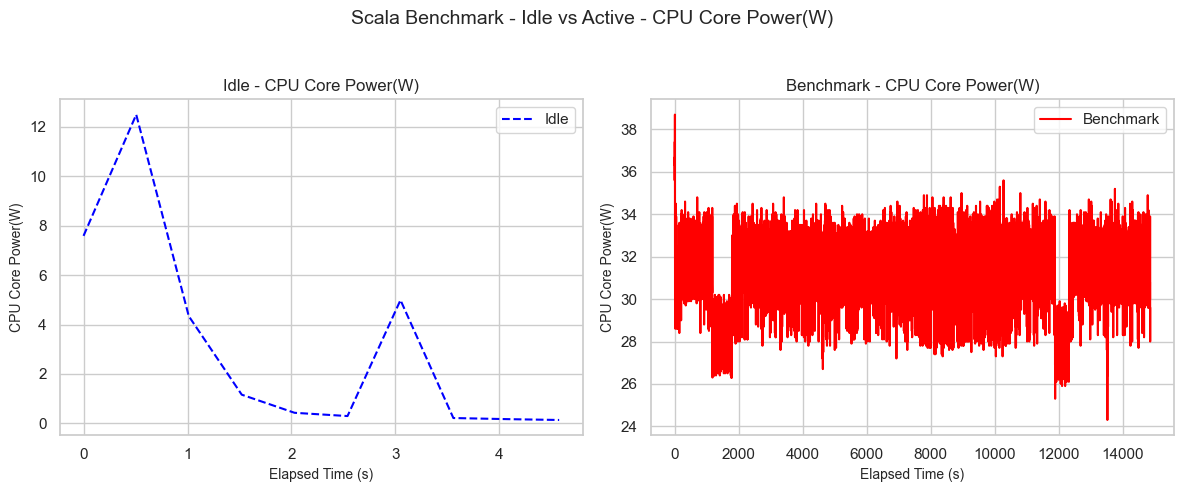

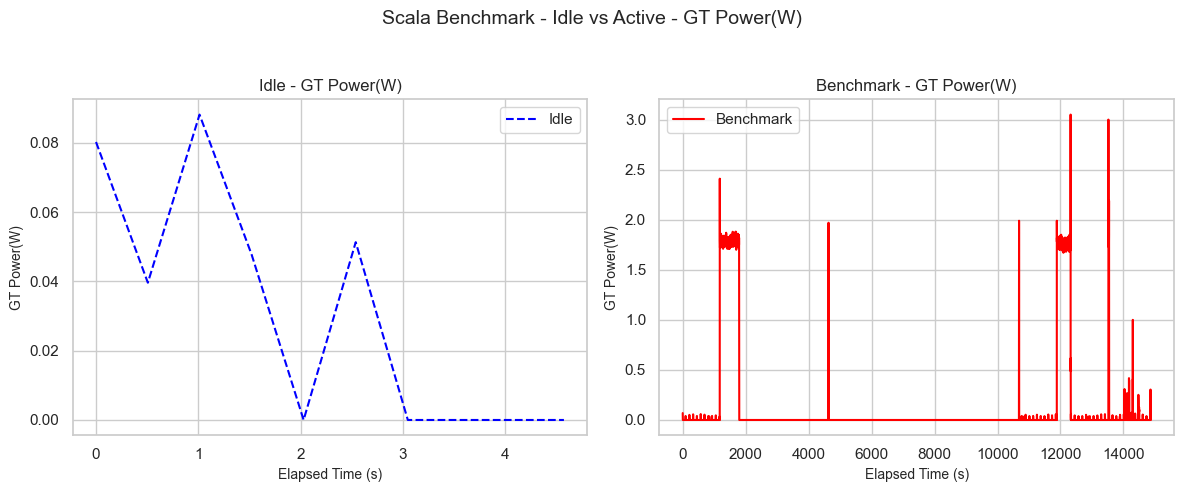

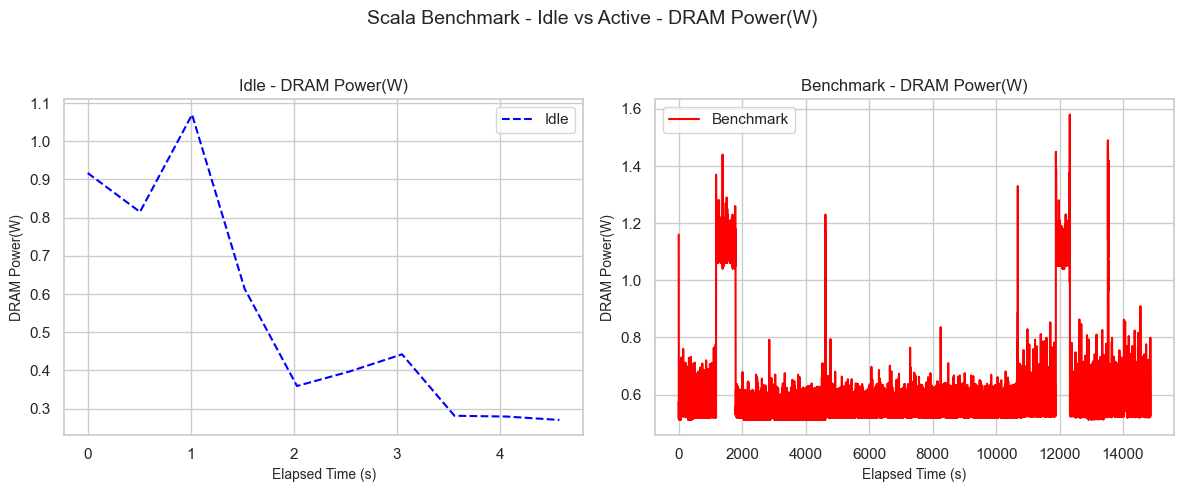

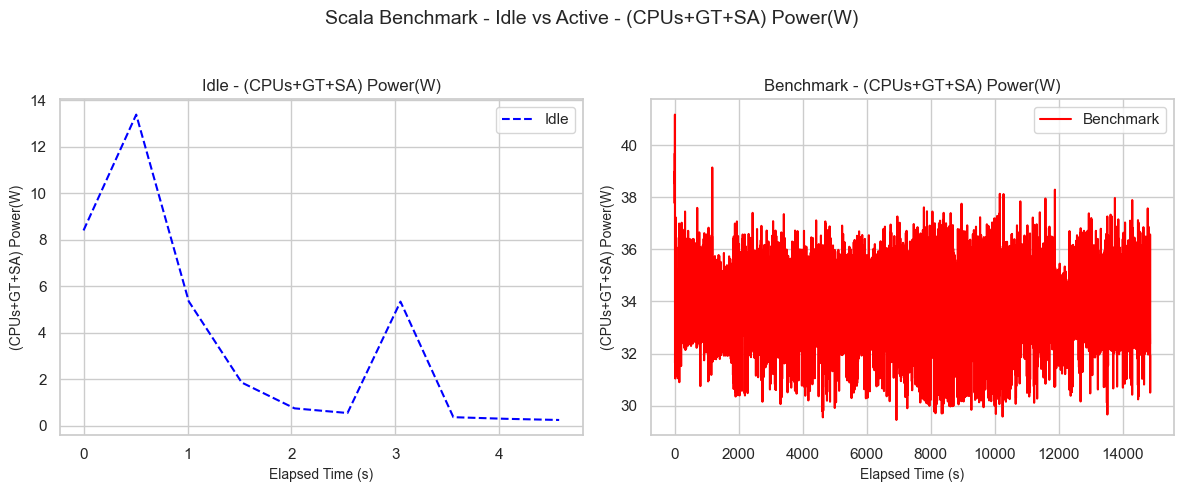

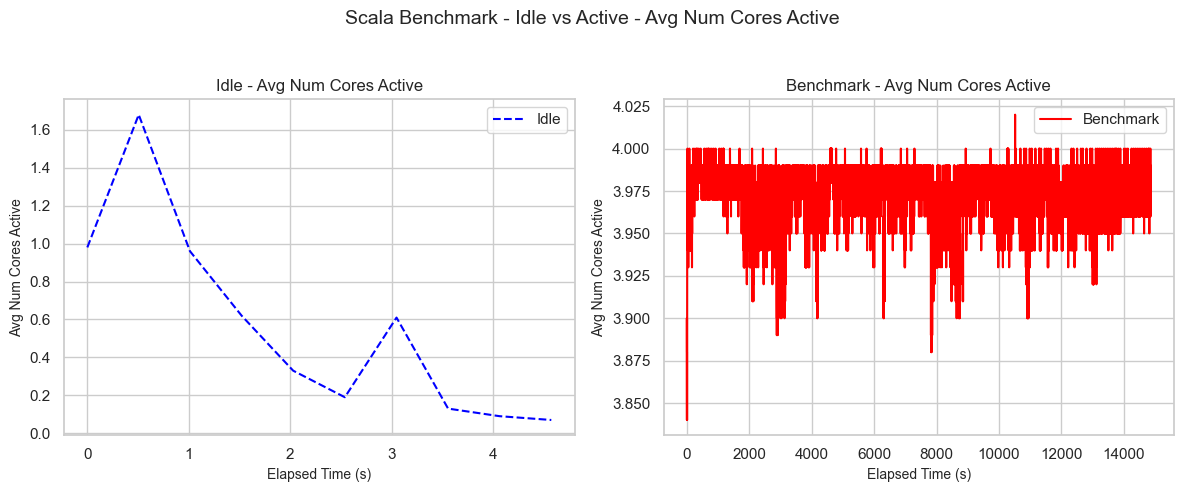

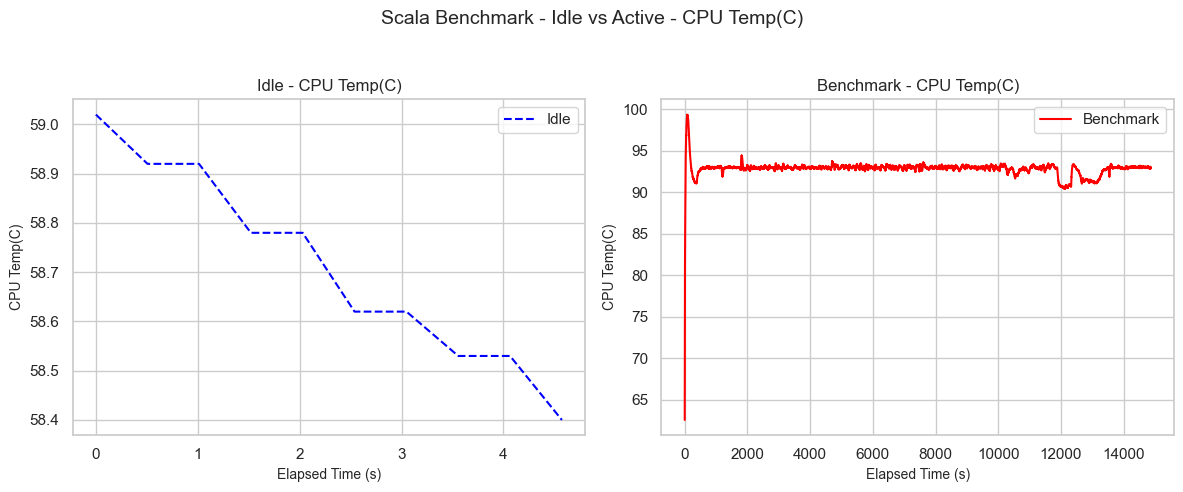

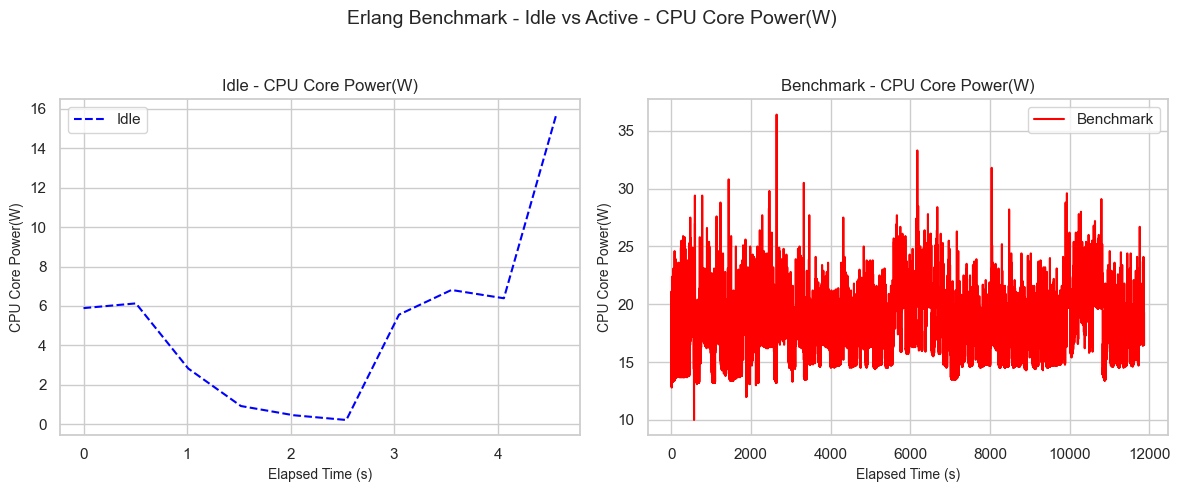

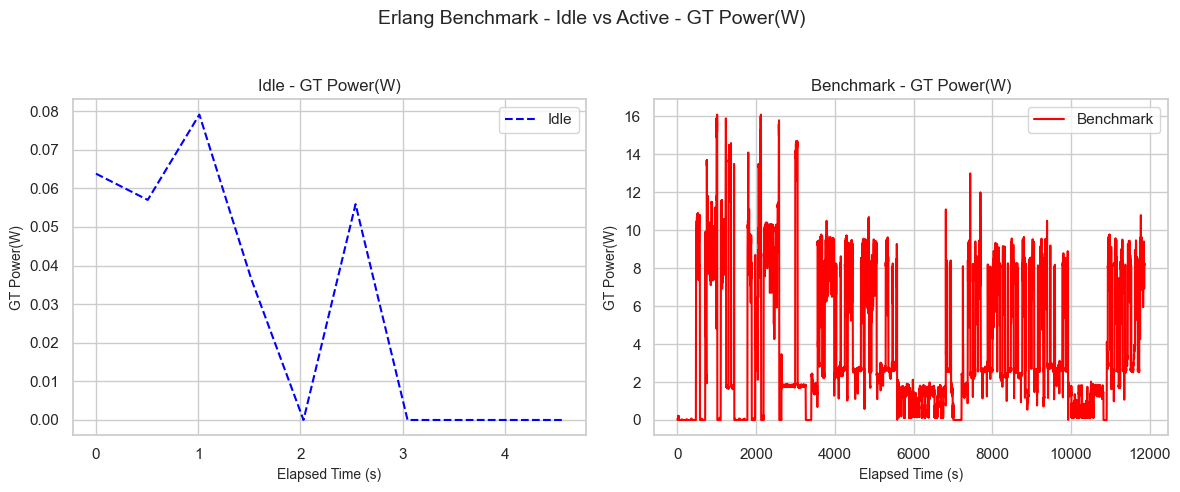

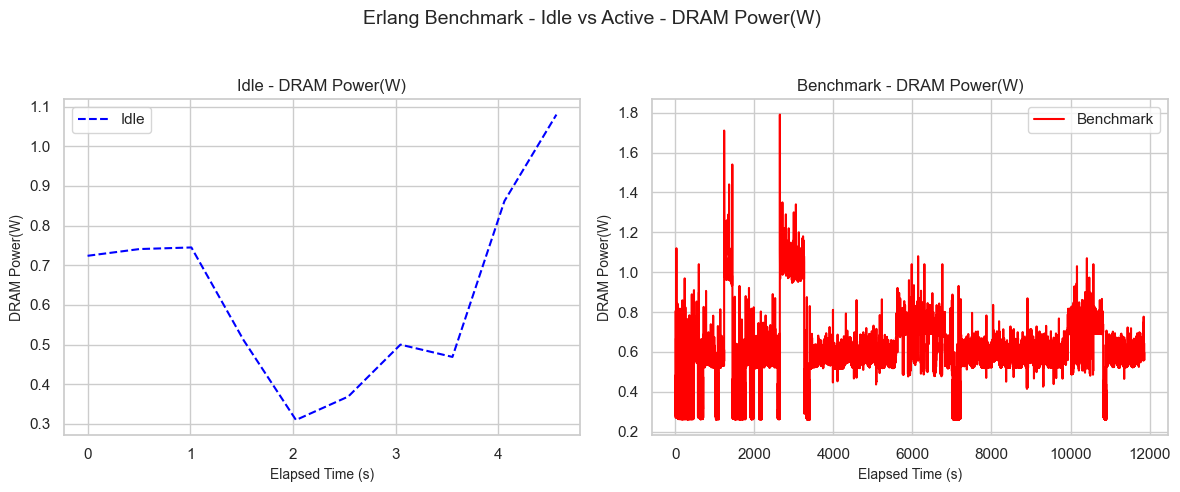

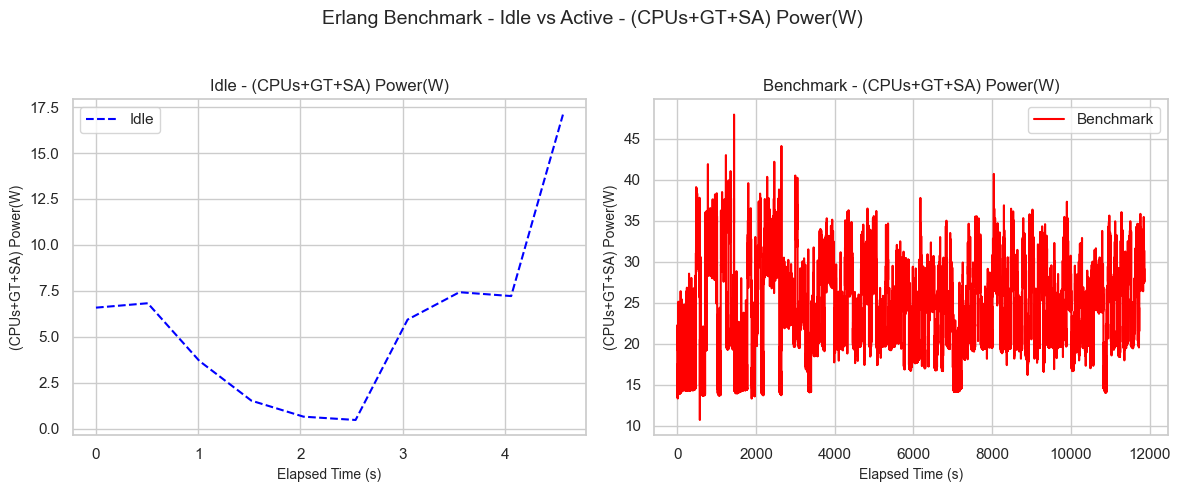

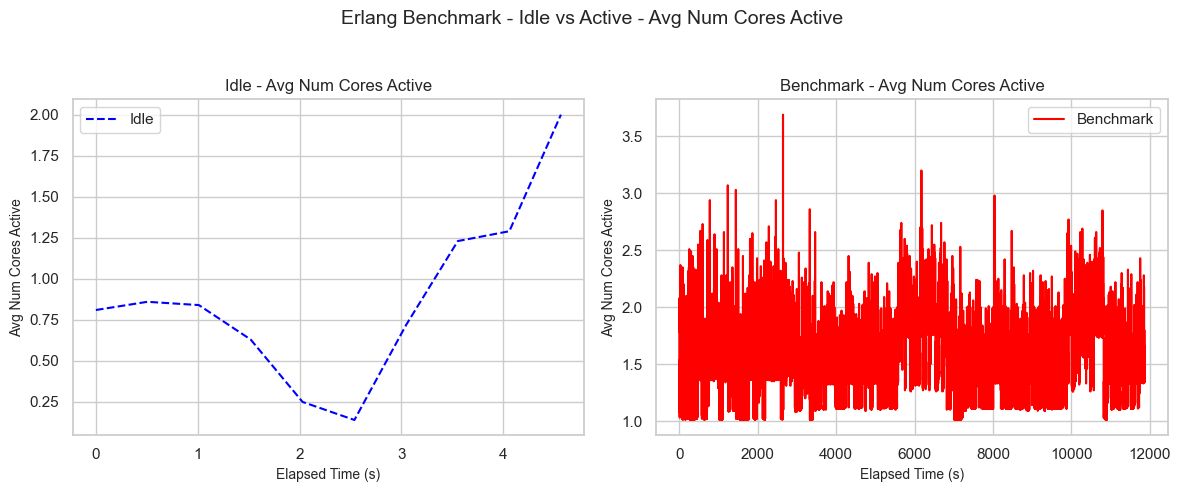

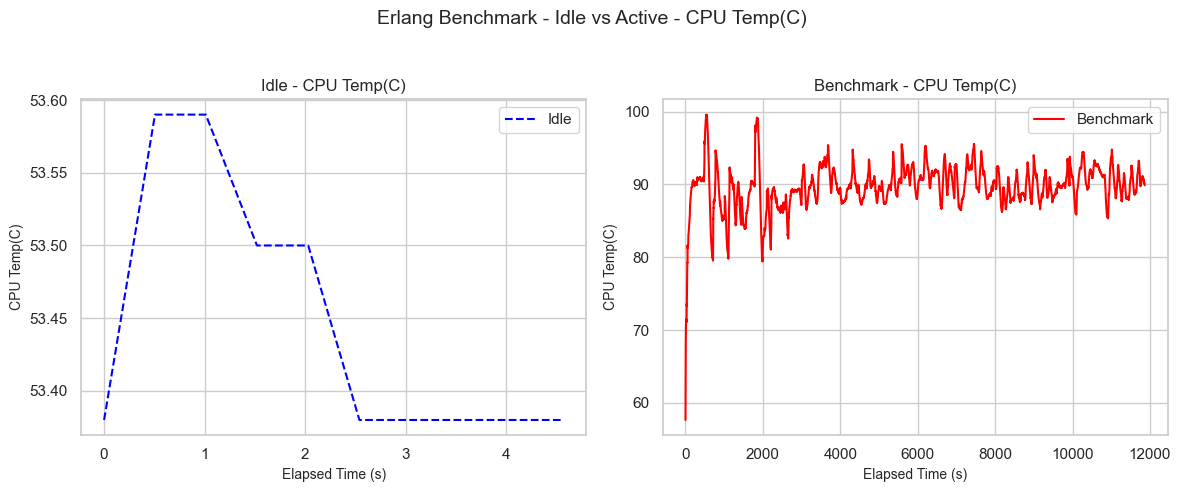

In [14]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [15]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [16]:
def format_message_count(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

message_label = format_message_count(NMSG)
title_config_prefix = f"({message_label} Messages, {ITERATIONS} Iterations)"

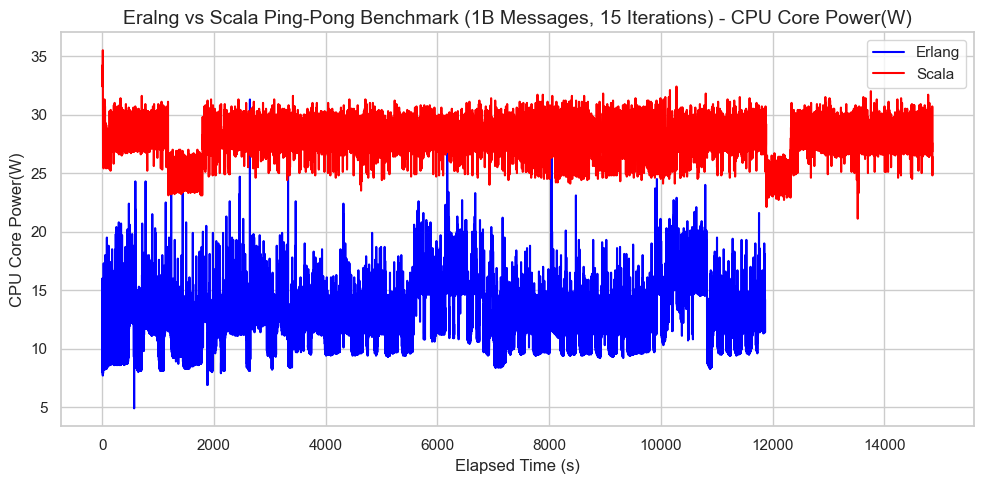

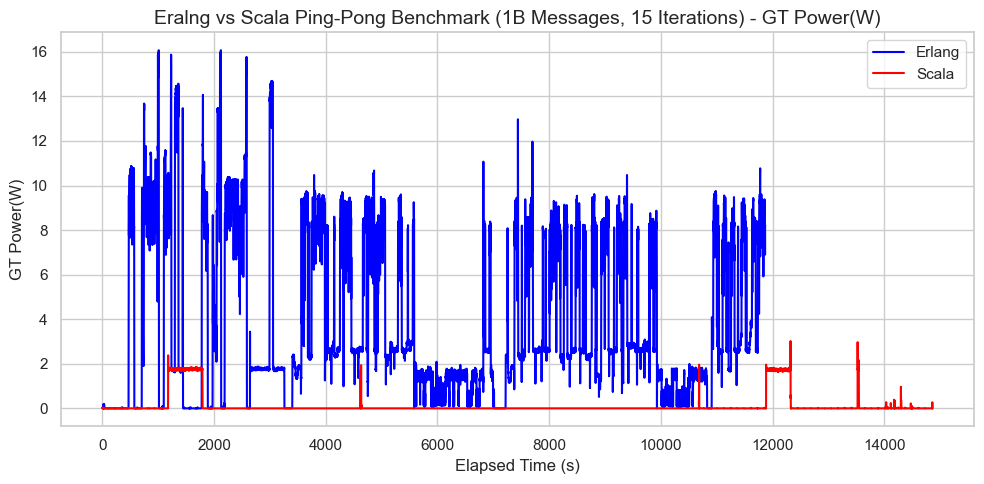

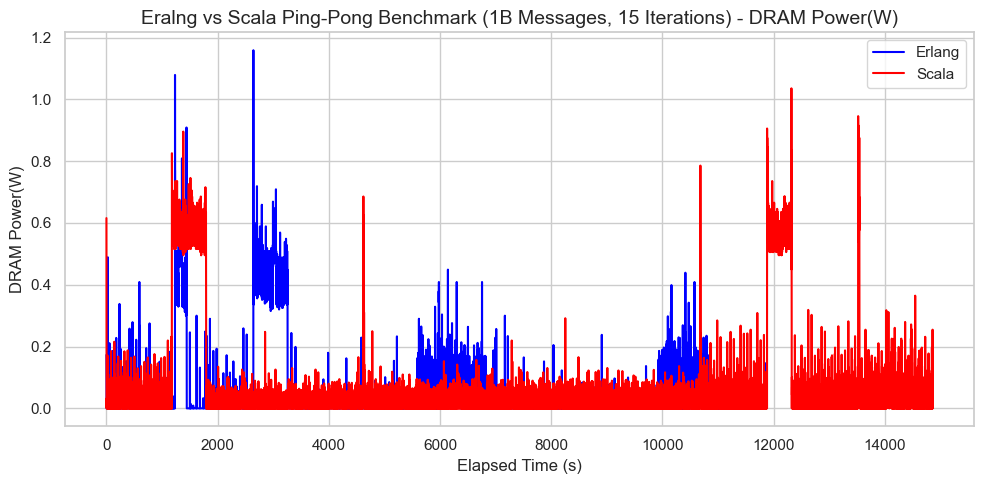

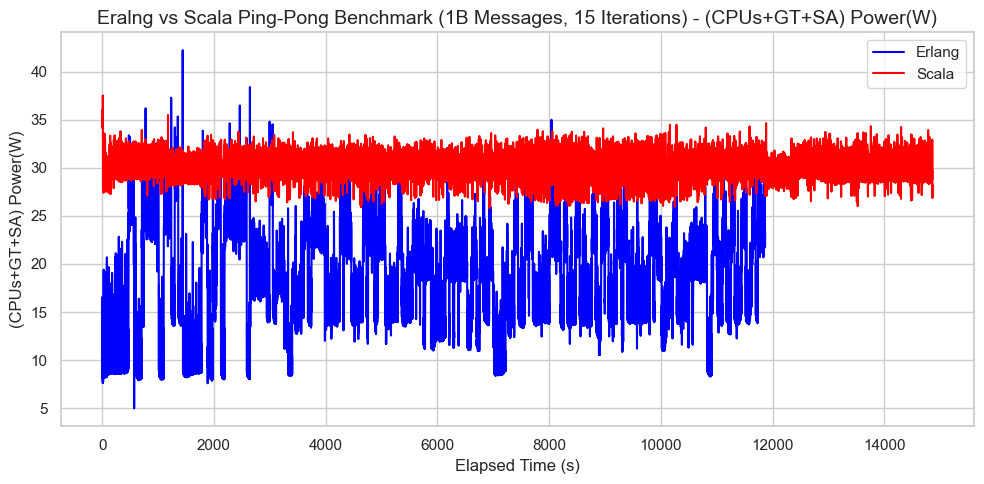

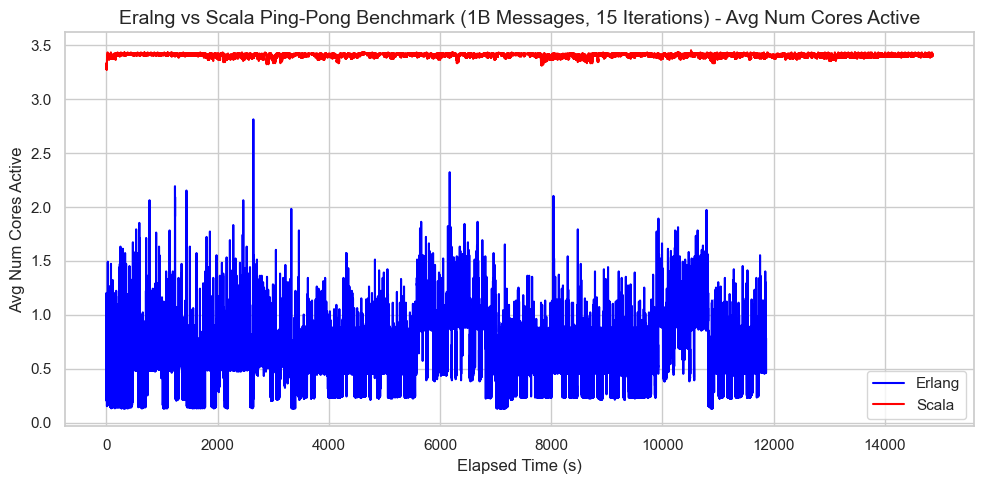

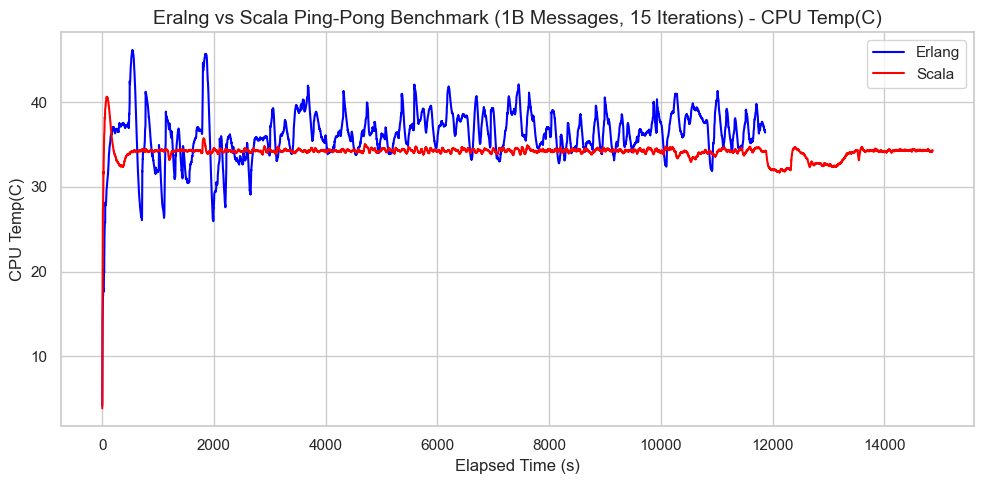

In [17]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Ping-Pong Benchmark {title_config_prefix}")


Compute Average Metrics

In [18]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [19]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        27.617010
GT Power(W)               0.099688
DRAM Power(W)             0.044372
(CPUs+GT+SA) Power(W)    29.801717
CPU Temp(C)              34.131861
Avg Num Cores Active      3.404158
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        12.341616
GT Power(W)               3.878548
DRAM Power(W)            -0.041246
(CPUs+GT+SA) Power(W)    17.922563
CPU Temp(C)              36.265444
Avg Num Cores Active      0.589595
dtype: float64


Compute Total Energy Consumption

In [20]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Number of Messages": NMSG,
    "Iterations": ITERATIONS,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["Number of Messages"] == NMSG) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for Number of Messages =", NMSG, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Skipping duplicate entry for Number of Messages = 1000000000 and Iterations = 15

Total Energy Consumption Comparison:
Scala Benchmark: 442972.0884273759 Joules
Erlang Benchmark: 212694.61920851786 Joules
